## Import Packeges

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv('013 IndexE8.csv')
df_copy = df.copy()

## Examining The data

In [3]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [5]:
df_copy.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_copy.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Ploting The Data

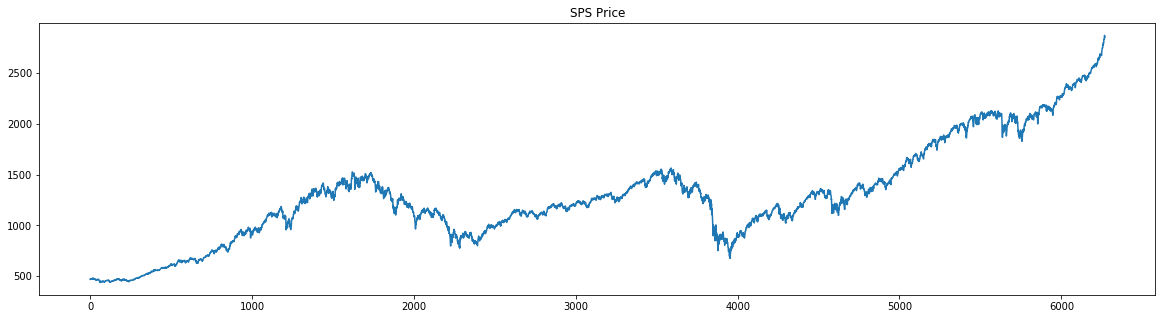

In [7]:
df_copy.spx.plot(figsize=(20,5), title='SPS Price')
plt.show()

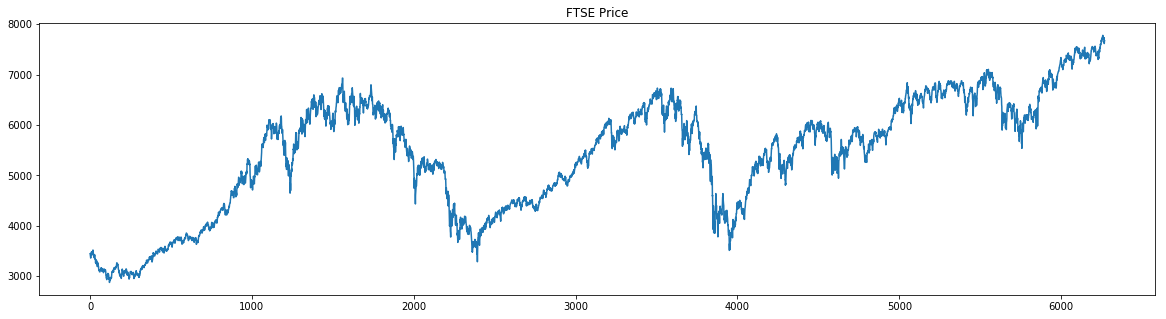

In [8]:
df_copy.ftse.plot(figsize=(20,5), title='FTSE Price')
plt.show()

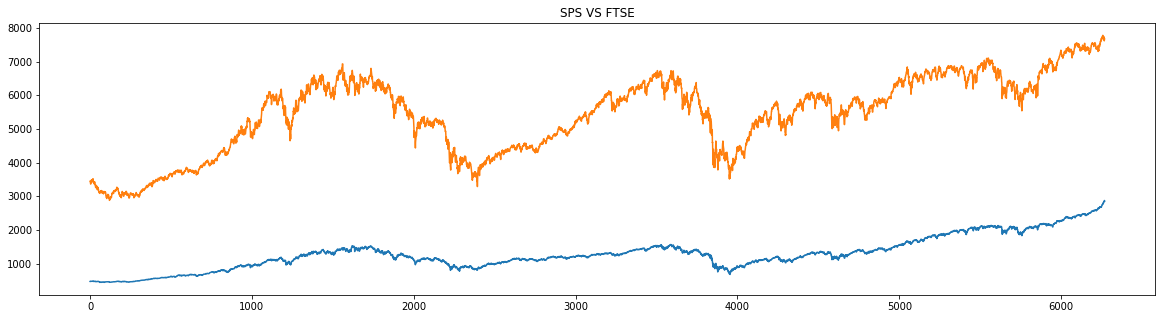

In [9]:
df_copy.spx.plot(figsize=(20,5), title='SPS Price')
df_copy.ftse.plot(figsize=(20,5), title='FTSE Price')
plt.title('SPS VS FTSE')
plt.show()

## QQ Plot

Quantile-Quantile Plot (QQPlot)

In [10]:
import scipy.stats
import pylab

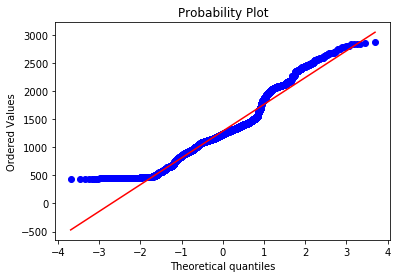

In [11]:
scipy.stats.probplot(df_copy.spx, plot=pylab)
pylab.show()

## Length of the time period

In [12]:
df_copy.date.describe()

count           6269
unique          6269
top       22/04/2014
freq               1
Name: date, dtype: object

## From Text to Date

In [14]:
df_copy['date'] = pd.to_datetime(df_copy.date, dayfirst=True)

In [15]:
df_copy.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [20]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting The Index

In [21]:
df_copy.set_index('date',inplace=True)

In [22]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [27]:
df_copy = df_copy.asfreq(freq='b')

In [28]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 4 columns):
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4)
memory usage: 245.2 KB


## Handling Missing Values

In [30]:
df_copy.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [32]:
df_copy.spx = df_copy.spx.fillna(method='ffill')

In [36]:
df_copy.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [38]:
df_copy.dax = df_copy.dax.fillna(method='bfill')

In [39]:
df_copy.isna().sum()

spx       0
dax       0
ftse      8
nikkei    8
dtype: int64

In [40]:
df_copy.ftse = df_copy.ftse.fillna(value=df_copy.ftse.mean())

In [41]:
df_copy.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [43]:
df_copy.nikkei = df_copy.nikkei.fillna(value=18443.44)

In [44]:
df_copy.nikkei.isna().sum()

0

In [45]:
df_copy.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the Data set

In [56]:
df_copy.drop('spx', inplace=True,axis=1)

In [54]:
df_copy['Market_Value'] = df_copy['spx']

In [57]:
df_copy.head()

,Market_Value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting the Data

In [58]:
size = int(len(df_copy) * 0.8)

In [62]:
df_train = df_copy[:size]

In [63]:
df_test = df_copy[size:]

In [64]:
df_train.head()

,Market_Value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [65]:
len(df_train)

5021

In [68]:
len(df_test) + len(df_train)

6277

In [69]:
len(df_copy)

6277

In [73]:
df_copy.head()

,Market_Value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## White Noise

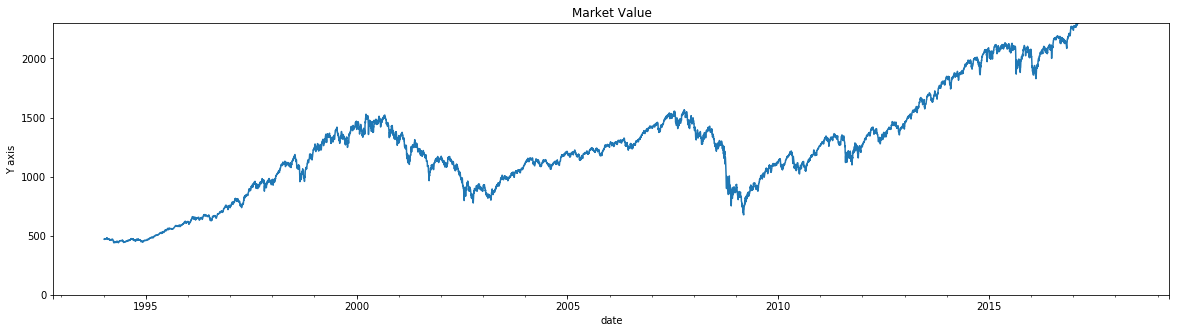

In [85]:
df_copy.Market_Value.plot(figsize=(20,5),)
plt.title('Market Value')
plt.ylim(0,2300)
plt.ylabel('Y axis')
plt.show()

## Random Walk

### Loading the data

In [86]:
rw = pd.read_csv('025 RandWalk.csv')

In [88]:
rw.describe()

,price
count,7029.000000
mean,1269.648367
std,443.999180
min,574.382397
25%,931.488599
50%,1155.773451
75%,1488.957260
max,2715.508720


In [87]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


##  From Text to date

In [90]:
rw['date'] = pd.to_datetime(rw.date,dayfirst=True)

In [91]:
rw.date.head()

0   1994-01-07
1   1994-01-08
2   1994-01-09
3   1994-01-10
4   1994-01-11
Name: date, dtype: datetime64[ns]

In [92]:
rw.head()

,date,price
0,1994-01-07,1122.139662
1,1994-01-08,1135.238562
2,1994-01-09,1109.897831
3,1994-01-10,1080.347860
4,1994-01-11,1082.095245


In [94]:
rw.set_index('date',inplace=True)

In [95]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [96]:
rw['rw'] = rw.price

In [97]:
rw.head()

,price,rw
date,,
1994-01-07,1122.139662,1122.139662
1994-01-08,1135.238562,1135.238562
1994-01-09,1109.897831,1109.897831
1994-01-10,1080.347860,1080.347860
1994-01-11,1082.095245,1082.095245


In [98]:
df_copy['rw'] = rw.rw

In [99]:
df_copy.head()

,Market_Value,rw
date,,
1994-01-07,469.90,1122.139662
1994-01-10,475.27,1080.347860
1994-01-11,474.13,1082.095245
1994-01-12,474.17,1083.639265
1994-01-13,472.47,1067.146255


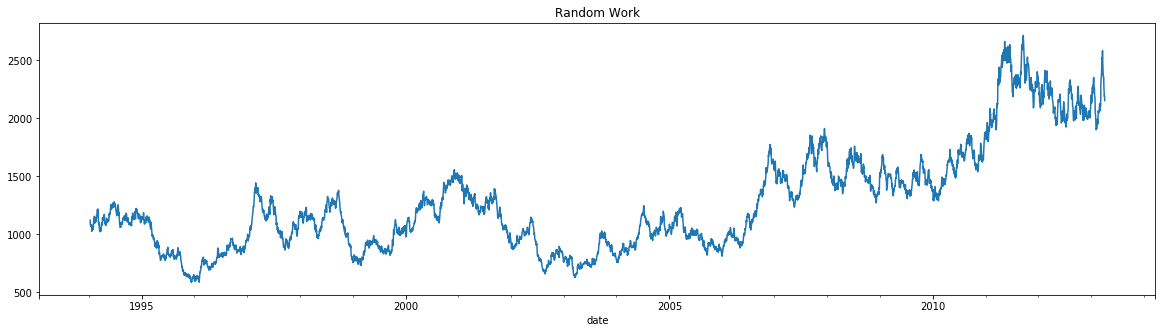

In [102]:
df_copy.rw.plot(figsize=(20,5),title='Random Work')
plt.show()

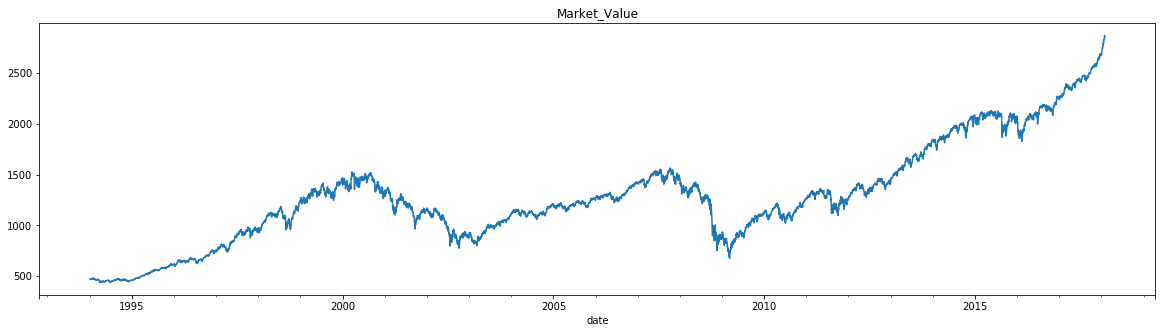

In [103]:
df_copy.Market_Value.plot(figsize=(20,5),title='Market_Value')
plt.show()

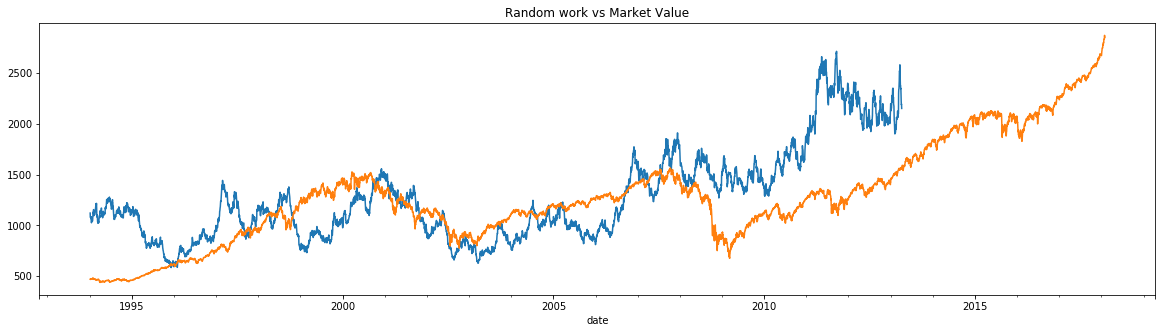

In [104]:
df_copy.rw.plot(figsize=(20,5),title='Random Work')
df_copy.Market_Value.plot(figsize=(20,5),title='Market value')
plt.title('Random work vs Market Value')
plt.show()

In [109]:
import warnings
warnings.filterwarnings('ignore')